# Vortex Lattice Method

### Javier Lendínez Castillo
 02/04/2024



In [8]:
import numpy as np
from lib import calculate_wing_geometry, interpolate_wing_points, generate_wing_panels, curvature, plot_wing, plot_wing_discretization, plot_wing_heatmap, plot_wing_lift, wing, alphas

# Wing parameters
u = 50                                  # Flight velocity in m/s
rho = 0.957                             # Air density in kg/m^3 at 2500 m altitude
NACA_root = "3215"                      # Profile at the root
NACA_tip = "1310"                       # Profile at the tip
alpha = np.radians(3)                   # Angle of attack in radians
taper_ratio = 0.8                       # Taper ratio (tip chord/root chord)
sweep = np.radians(30)                  # Sweep angle (angle formed by the line connecting the aerodynamic centers with the "y" coordinate axis)
chord_root = 1                          # Root chord
chord_tip = taper_ratio * chord_root    # Tip chord
wing_span = 2 * (4 * chord_root)        # Wing span

n = 2                                  # Number of panels along the span
m = 2                                   # Number of panels along the chord

# Wing geometry
wing_geometry = calculate_wing_geometry(chord_root, chord_tip, wing_span, sweep)

# Wing discretization
wing_vertical_points, wing_horizontal_points = interpolate_wing_points(wing_geometry, n=n+1, m=m+1)  # Interpolate wing points
panel_data, panel_lengths = generate_wing_panels(wing_vertical_points, wing_horizontal_points)

# Curvature along the chord throughout the wing span
dz_c = curvature(NACA_root, NACA_tip, wing_horizontal_points, alpha, panel_data, chord_root, chord_tip, n, m)  # Calculate curvature at each control point

# Calculate wing lift
w_i, P_ij, gammas, lift, lift_sum, CL = wing(panel_data, u, dz_c, alpha, rho, sweep, panel_lengths, n, m, wing_span)

Total Lift: 3568.8274976920497
CL: 0.37291823382362066


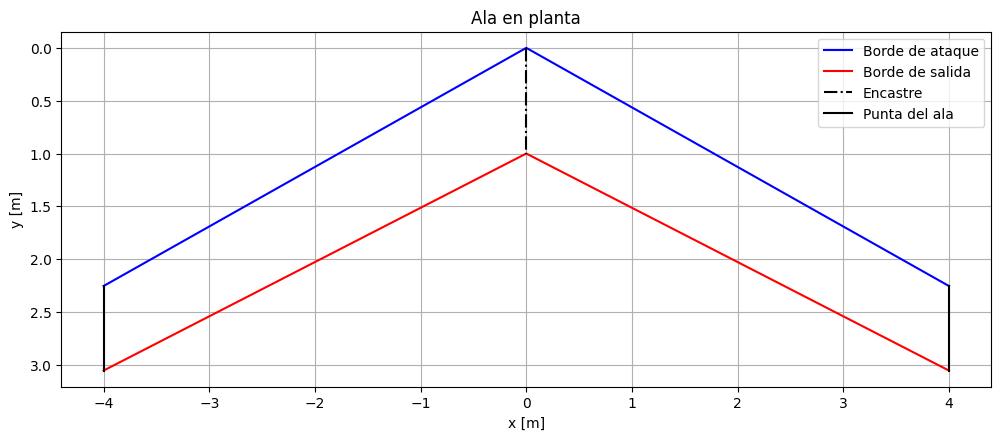

In [9]:
plot_wing(wing_geometry, wing_span)

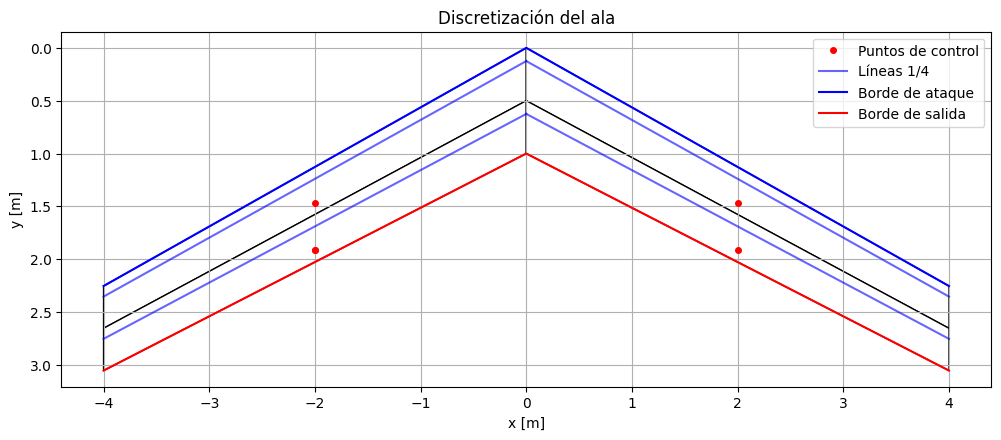

In [10]:
plot_wing_discretization(panel_data, wing_geometry)

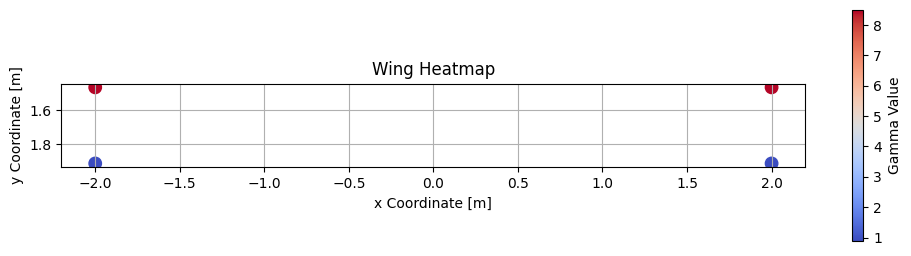

In [11]:
plot_wing_heatmap(panel_data, gammas)

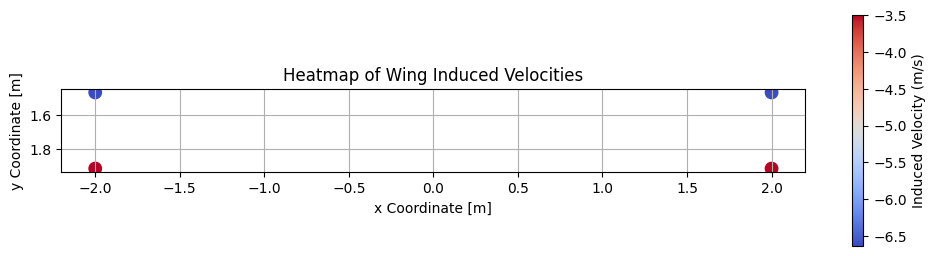

In [12]:
plot_wing_heatmap(panel_data, w_i, title="Heatmap of Wing Induced Velocities", legend="Induced Velocity (m/s)")

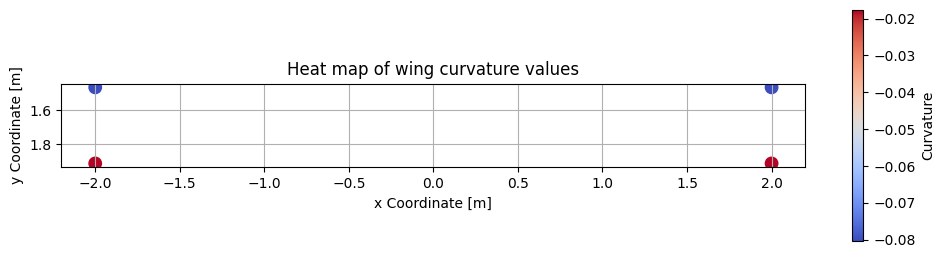

In [13]:
plot_wing_heatmap(panel_data, dz_c, title="Heat map of wing curvature values", legend="Curvature")

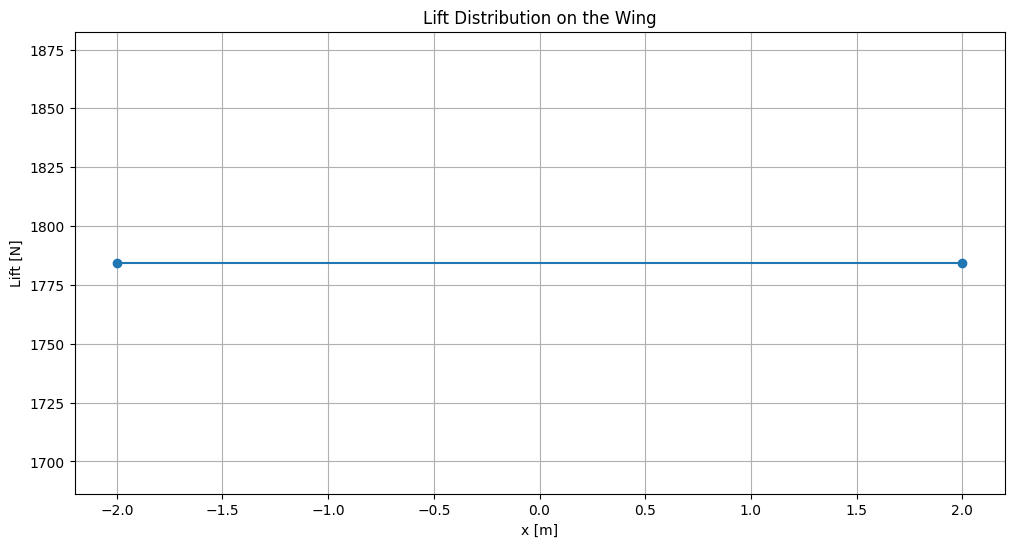

Total Lift: 3568.8274976920497
CL: 0.37291823382362066


In [14]:
# Dibujar la distribución de sustentación en el ala en los puntos de control
plot_wing_lift(panel_data, lift_sum)
print("Total Lift:", lift)
print("CL:", CL)